In [1]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/google-stock-price-train/Google_Stock_Price_Train.csv")
print(df.head(3))
print("\n")
print(df.isnull().sum())
print("\n")
print(df.info())
print("\n")
print(df.describe())

       Date    Open    High     Low   Close     Volume
0  1/3/2012  325.25  332.83  324.97  663.59  7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45  5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21  6,590,300


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None


              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25% 

In [3]:
df.tail

<bound method NDFrame.tail of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]>

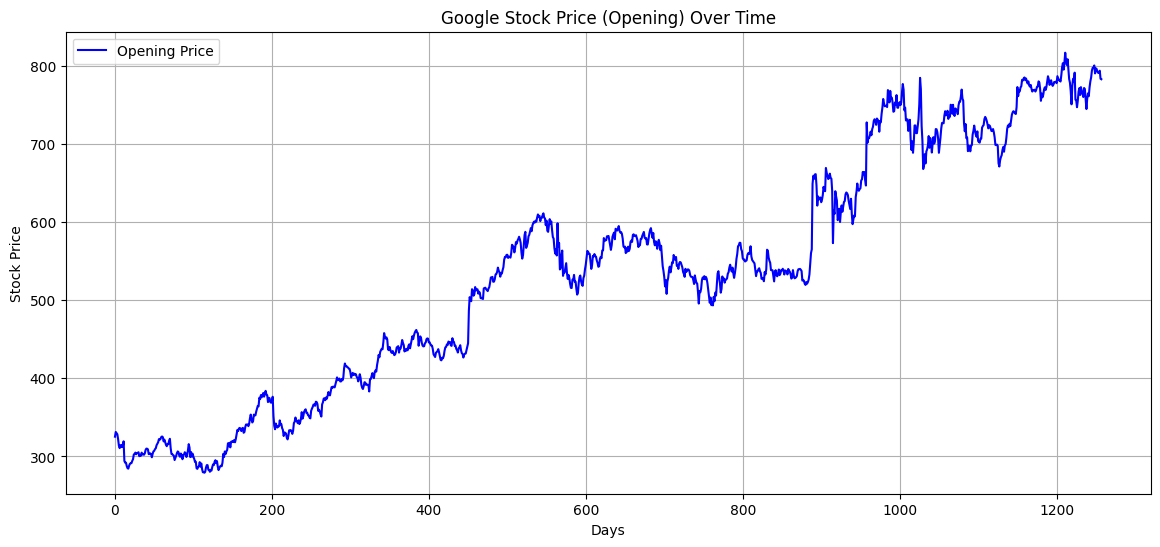

In [5]:
# Visualization: Line Plot for Stock Price ('Open') over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Open'], color='blue', label='Opening Price')
plt.title('Google Stock Price (Opening) Over Time')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


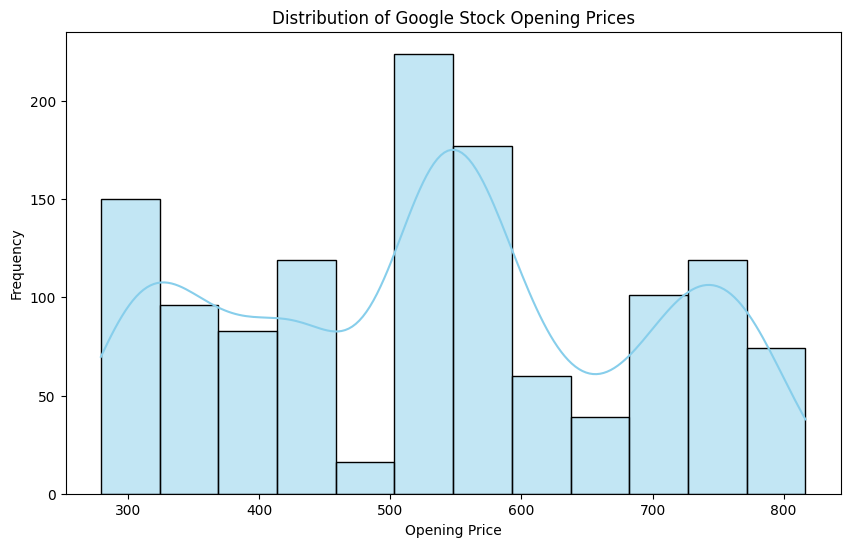

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Open'], kde=True, color='skyblue')
plt.title('Distribution of Google Stock Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.show()


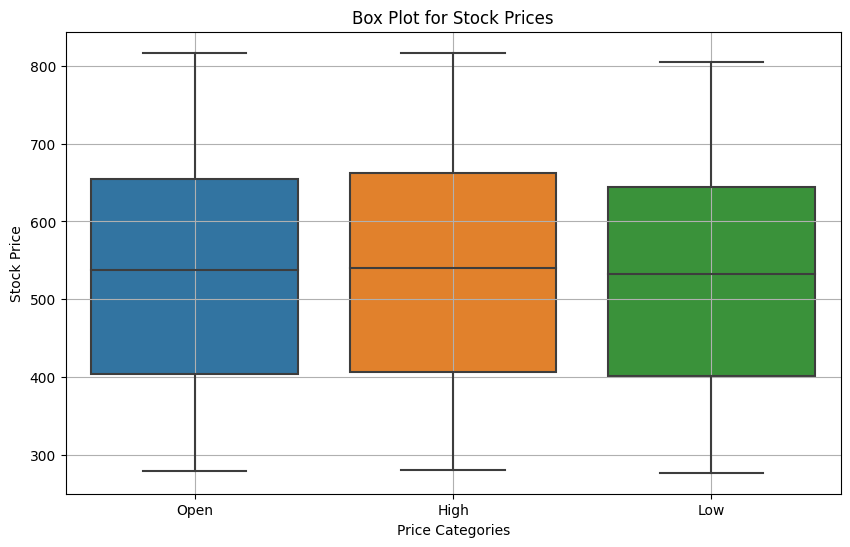

In [7]:
# Visualization: Box Plot for Stock Price Columns
stock_columns = ['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[stock_columns])
plt.title('Box Plot for Stock Prices')
plt.xlabel('Price Categories')
plt.ylabel('Stock Price')
plt.grid()
plt.show()

In [8]:
data = df.iloc[:,1:2]

In [9]:
print(data.head(2))
print("\n")
print(data.shape)

     Open
0  325.25
1  331.27


(1258, 1)


In [10]:
data.tail

<bound method NDFrame.tail of         Open
0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
...      ...
1253  790.90
1254  790.68
1255  793.70
1256  783.33
1257  782.75

[1258 rows x 1 columns]>

In [11]:
data = data.values

In [12]:
sc = MinMaxScaler(feature_range=(0, 1))
data = sc.fit_transform(data)

In [13]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, data.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(data[i-60:i,0])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(data[i,0])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1198, 60)
(1198,)


In [14]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))

In [15]:
X_Train.shape

(1198, 60, 1)

In [16]:
X_Train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [17]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
regressor.fit(X_Train, Y_Train, epochs = 60, batch_size = 32)

Epoch 1/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0896
Epoch 2/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0058
Epoch 3/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0066
Epoch 4/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0052
Epoch 5/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0060
Epoch 6/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0056
Epoch 7/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0049
Epoch 8/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0053
Epoch 9/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0055
Epoch 10/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0041
Epoch 11/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0037
Epoch 12/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0046
Epoch 13/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0040
Epoch 14/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0042
Epoch 15/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0038
E

In [17]:
df1 = pd.read_csv('/kaggle/input/google-stock-price-test/Google_Stock_Price_Test.csv')
df1.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"


In [18]:
df1.shape

(20, 6)

In [19]:
Df_Total = pd.concat((df["Open"], df1["Open"]), axis=0)
Df_Total.shape

(1278,)

In [20]:
len(Df_Total) , len(df1)

(1278, 20)

In [21]:
# Getting the predicted stock price of 2017
# len(Df_Total)  ----- >. Total 1278 rows
# len(df1) ----> 20 Rows 
# result When we Subtract we get Original Dataset 
# We need Prevoius 60 to predict NEW so we do -60
# that would be our inputs 
inputs = Df_Total[len(Df_Total) - len(df1) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

real_stock_price = df1['Open'].values

mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 19.37540939283832
Mean Absolute Error (MAE): 16.87361486816406


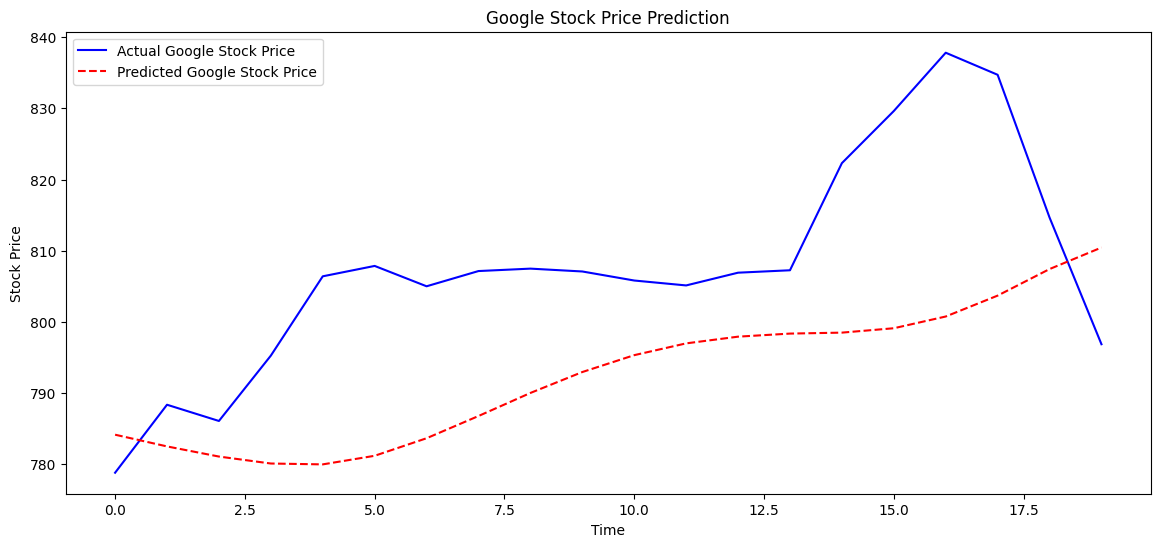

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(14, 6))
plt.plot(real_stock_price, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', linestyle='--', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**RNN model for comparison**

In [24]:
from keras.layers import SimpleRNN

# Build the RNN model
rnn_regressor = Sequential()

# Adding the first RNN layer and Dropout
rnn_regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_Train.shape[1], 1)))
rnn_regressor.add(Dropout(0.2))

# Adding a second RNN layer and Dropout
rnn_regressor.add(SimpleRNN(units=50, return_sequences=True))
rnn_regressor.add(Dropout(0.2))

# Adding a third RNN layer and Dropout
rnn_regressor.add(SimpleRNN(units=50, return_sequences=True))
rnn_regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and Dropout
rnn_regressor.add(SimpleRNN(units=50))
rnn_regressor.add(Dropout(0.2))

# Adding the output layer
rnn_regressor.add(Dense(units=1))

# Compiling the RNN
rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Training the RNN model on the training set
rnn_regressor.fit(X_Train, Y_Train, epochs=60, batch_size=32)


Epoch 1/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.5331
Epoch 2/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2948
Epoch 3/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2476
Epoch 4/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.1629
Epoch 5/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.1173
Epoch 6/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.1080
Epoch 7/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0987
Epoch 8/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0631
Epoch 9/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0591
Epoch 10/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0513
Epoch 11/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0442
Epoch 12/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0444
Epoch 13/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0351
Epoch 14/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0311
Epoch 15/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0273
Epoc

In [26]:
# Making predictions using the RNN model
rnn_predicted_stock_price = rnn_regressor.predict(X_test)

# Inverse transformation to get actual values
rnn_predicted_stock_price = sc.inverse_transform(rnn_predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

# Calculate RMSE for RNN model
rnn_rmse = np.sqrt(mean_squared_error(real_stock_price, rnn_predicted_stock_price))

print(f"LSTM RMSE: {lstm_rmse}")
print(f"RNN RMSE: {rnn_rmse}")


LSTM RMSE: 19.37540939283832
RNN RMSE: 13.845278098513106


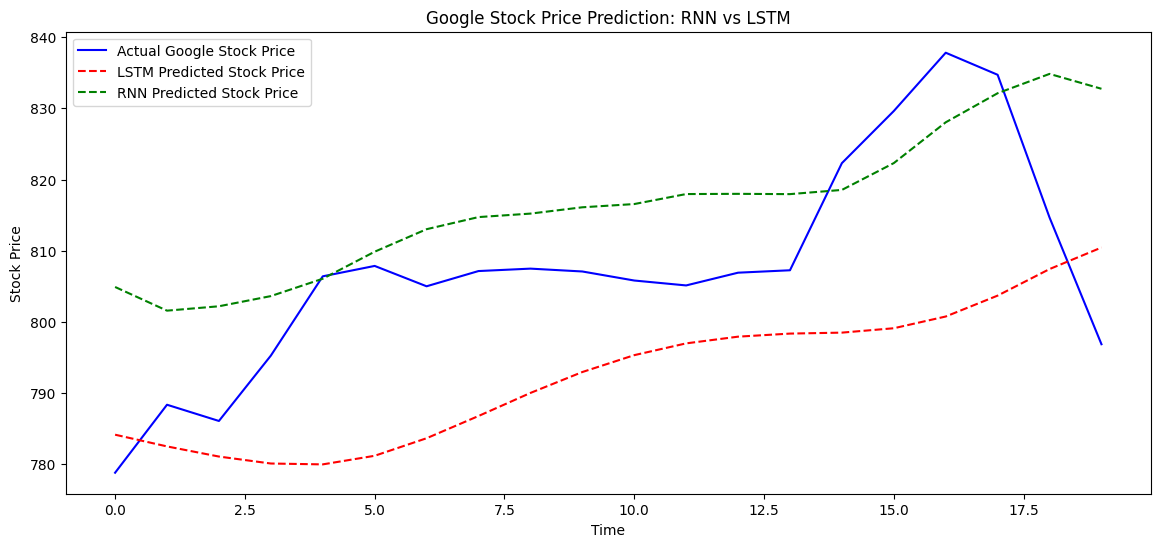

In [28]:
plt.figure(figsize=(14, 6))

# Plot actual stock prices
plt.plot(real_stock_price, color='blue', label='Actual Google Stock Price')

# Plot LSTM predictions
plt.plot(predicted_stock_price, color='red', linestyle='--', label='LSTM Predicted Stock Price')

# Plot RNN predictions
plt.plot(rnn_predicted_stock_price, color='green', linestyle='--', label='RNN Predicted Stock Price')

plt.title('Google Stock Price Prediction: RNN vs LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**Compare RNN Models**

**Hyperameter Tuning**

In [45]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf

# Function to build a basic RNN model with customizable units and dropout
def build_simple_rnn(units = 50, dropout_rate=0.2):
    model = Sequential()
    model.add(SimpleRNN(units=units, input_shape=(X_Train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Different configurations of RNN models to compare
rnn_configs = [
    {"units": 50, "dropout_rate": 0.2},
    {"units": 100, "dropout_rate": 0.2},
    {"units": 150, "dropout_rate": 0.2}
]

# Store RMSE results for each configuration
rnn_rmse_results = {}

# Train and evaluate each RNN model configuration
for i, config in enumerate(rnn_configs):
    model = build_simple_rnn(units=config["units"], dropout_rate=config["dropout_rate"])
    model.fit(X_Train, Y_Train, epochs=30, batch_size=32, verbose=0)  # Train each model for 30 epochs

    # Predict on test data
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(df1['Open'], predicted_stock_price))
    rnn_rmse_results[f'Config {i+1}'] = {
        "units": config["units"],
        "dropout_rate": config["dropout_rate"],
        "RMSE": rmse
    }

# Display results
print("\nRNN Model Performance (RMSE with Configuration Details):")
for config, result in rnn_rmse_results.items():
    print(f"{config} - Units: {result['units']}, Dropout Rate: {result['dropout_rate']}, RMSE: {result['RMSE']}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step

RNN Model Performance (RMSE with Configuration Details):
Config 1 - Units: 50, Dropout Rate: 0.2, RMSE: 11.374646133511046
Config 2 - Units: 100, Dropout Rate: 0.2, RMSE: 12.300194221151155
Config 3 - Units: 150, Dropout Rate: 0.2, RMSE: 25.371411825867682


In [48]:
def build_simple_rnn(units=100, dropout_rate = 0):
    model = Sequential()
    model.add(SimpleRNN(units=units, input_shape=(X_Train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Different configurations of RNN models to compare
rnn_configs = [
    {"units": 100, "dropout_rate": 0},
    {"units": 100, "dropout_rate": 0.1},
    {"units": 100, "dropout_rate": 0.2},
    {"units": 100, "dropout_rate": 0.3}
]

# Store RMSE results for each configuration
rnn_rmse_results = {}

# Train and evaluate each RNN model configuration
for i, config in enumerate(rnn_configs):
    model = build_simple_rnn(units=config["units"], dropout_rate=config["dropout_rate"])
    model.fit(X_Train, Y_Train, epochs=30, batch_size=32, verbose=0)  # Train each model for 30 epochs

    # Predict on test data
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(df1['Open'], predicted_stock_price))
    rnn_rmse_results[f'Config {i+1}'] = {
        "units": config["units"],
        "dropout_rate": config["dropout_rate"],
        "RMSE": rmse
    }

# Display results
print("\nRNN Model Performance (RMSE with Configuration Details):")
for config, result in rnn_rmse_results.items():
    print(f"{config} - Units: {result['units']}, Dropout Rate: {result['dropout_rate']}, RMSE: {result['RMSE']}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

RNN Model Performance (RMSE with Configuration Details):
Config 1 - Units: 100, Dropout Rate: 0, RMSE: 15.141432840639311
Config 2 - Units: 100, Dropout Rate: 0.1, RMSE: 16.349044965286954
Config 3 - Units: 100, Dropout Rate: 0.2, RMSE: 11.699714356902236
Config 4 - Units: 100, Dropout Rate: 0.3, RMSE: 22.068697145565423


In [31]:
def build_simple_rnn_with_activation(units=50, dropout_rate=0.2, activation_function='tanh'):
    model = Sequential()
    # The activation function is passed as a parameter
    model.add(SimpleRNN(units=100, input_shape=(X_Train.shape[1], 1), activation=activation_function))  # Units fixed at 100 and dropout 0.2
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Different activation functions to compare
activation_functions = ['tanh', 'relu', 'sigmoid', 'linear']

# Store RMSE results for each configuration
rnn_rmse_results_with_activation = {}

# Train and evaluate each RNN model configuration with different activation functions
for activation in activation_functions:
    model = build_simple_rnn_with_activation(activation_function=activation)
    model.fit(X_Train, Y_Train, epochs=30, batch_size=32, verbose=0)  # Train each model for 30 epochs

    # Predict on test data
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(df1['Open'], predicted_stock_price))
    rnn_rmse_results_with_activation[f'Activation {activation}'] = rmse

# Display results
print("\nRNN Model Performance (RMSE with Different Activation Functions):")
for activation, rmse in rnn_rmse_results_with_activation.items():
    print(f"{activation} - RMSE: {rmse}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step

RNN Model Performance (RMSE with Different Activation Functions):
Activation tanh - RMSE: 11.119694200778323
Activation relu - RMSE: 15.491600103964428
Activation sigmoid - RMSE: 15.04292315091127
Activation linear - RMSE: 11.334906463376209


In [37]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [38]:
rnn_regressor.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

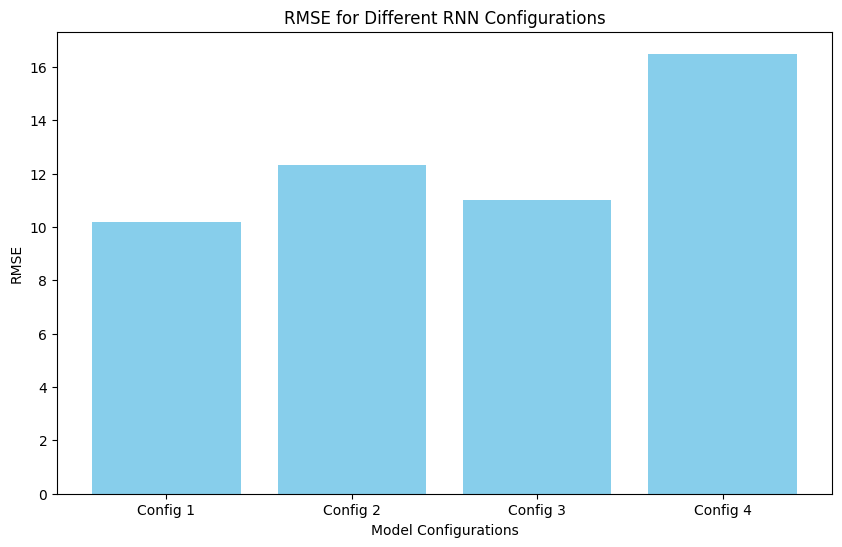

In [40]:
import matplotlib.pyplot as plt

# Extract configurations and RMSE values for plotting
config_labels = [f"Config {i+1}" for i in range(len(rnn_configs))]
rmse_values = [result["RMSE"] for result in rnn_rmse_results.values()]

# Plotting RMSE for each configuration
plt.figure(figsize=(10, 6))
plt.bar(config_labels, rmse_values, color='skyblue')
plt.xlabel('Model Configurations')
plt.ylabel('RMSE')
plt.title('RMSE for Different RNN Configurations')
plt.show()
